In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt

In [3]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [4]:
#Loading Data
company = 'FB'
start = dt.datetime(2012,1,1)
end = dt.datetime(2020,1,1)
data = web.DataReader(company,'yahoo', start,end)

In [5]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-05-18,45.000000,38.000000,42.049999,38.230000,573576400,38.230000
2012-05-21,36.660000,33.000000,36.529999,34.029999,168192700,34.029999
2012-05-22,33.590000,30.940001,32.610001,31.000000,101786600,31.000000
2012-05-23,32.500000,31.360001,31.370001,32.000000,73600000,32.000000
2012-05-24,33.209999,31.770000,32.950001,33.029999,50237200,33.029999


In [6]:
# Preparing Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

prediction_days = 60
x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x,0])
    y_train.append(scaled_data[x,0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))



In [7]:
# Building model
model = Sequential()
model.add(LSTM(units=50,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train,y_train,epochs=25,batch_size=32)

Epoch 1/25
59/59 [==============================] - 9s 75ms/step - loss: 0.0242
Epoch 2/25
59/59 [==============================] - 4s 75ms/step - loss: 0.0041
Epoch 3/25
59/59 [==============================] - 4s 74ms/step - loss: 0.0039
Epoch 4/25
59/59 [==============================] - 4s 75ms/step - loss: 0.0036
Epoch 5/25
59/59 [==============================] - 4s 73ms/step - loss: 0.0035
Epoch 6/25
59/59 [==============================] - 4s 73ms/step - loss: 0.0040
Epoch 7/25
59/59 [==============================] - 4s 73ms/step - loss: 0.0031
Epoch 8/25
59/59 [==============================] - 4s 73ms/step - loss: 0.0033
Epoch 9/25
59/59 [==============================] - 4s 73ms/step - loss: 0.0032
Epoch 10/25
59/59 [==============================] - 4s 72ms/step - loss: 0.0039
Epoch 11/25
59/59 [==============================] - 4s 74ms/step - loss: 0.0026
Epoch 12/25
59/59 [==============================] - 5s 77ms/step - loss: 0.0026
Epoch 13/25
59/59 [==================

In [9]:
# Test The Model Accuracy on Existing Data
# Load Test Data
#Loading Data

test_start = dt.datetime(2020,1,1)
test_end = dt.datetime.now()
test_data = web.DataReader(company,'yahoo', test_start,test_end)
actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'],test_data['Close']),axis=0)

model_inputs = total_dataset[len(total_dataset)- len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)

In [12]:
# Make Prediction on Test Data

x_test = []

for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)


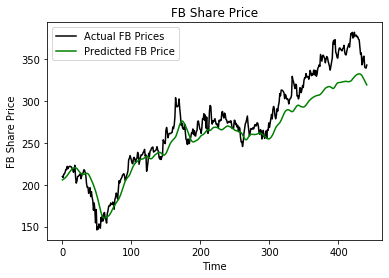

In [16]:
# Plot predictions
plt.plot(actual_prices, color = "black", label = f"Actual {company} Prices")
plt. plot(predicted_prices, color='green', label=f"Predicted {company} Price")
plt.title(f"{company} Share Price")
plt.xlabel('Time')
plt.ylabel(f"{company} Share Price")
plt.legend()
plt.show()

In [18]:
# Predict Next Day

real_data = [model_inputs[len(model_inputs)+1 - prediction_days:len(model_inputs+1),0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0],real_data.shape[1],1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"Prediction: {prediction}")

Prediction: [[317.77283]]


In [28]:

real_data = [model_inputs[len(model_inputs)+1 - prediction_days:len(model_inputs+1),0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0],real_data.shape[1],1))

real_data = scaler.inverse_transform(real_data)

ValueError: Found array with dim 3. Estimator expected <= 2.

In [26]:
test_start = dt.datetime(2020,1,1)
test_end = dt.datetime.now()
test_data = web.DataReader(company,'yahoo', test_start,test_end)
actual_prices = test_data['Close'].values

In [27]:
actual_prices

array([209.77999878, 208.66999817, 212.6000061 , 213.05999756,
       215.22000122, 218.30000305, 218.05999756, 221.91000366,
       219.05999756, 221.1499939 , 221.77000427, 222.13999939,
       221.44000244, 221.32000732, 219.75999451, 217.94000244,
       214.86999512, 217.78999329, 223.22999573, 209.52999878,
       201.91000366, 204.19000244, 209.83000183, 210.11000061,
       210.8500061 , 212.33000183, 213.05999756, 207.19000244,
       210.75999451, 213.13999939, 214.17999268, 217.80000305,
       217.49000549, 214.58000183, 210.17999268, 200.72000122,
       196.77000427, 197.19999695, 189.75      , 192.47000122,
       196.44000244, 185.88999939, 191.75999451, 185.16999817,
       181.08999634, 169.5       , 178.19000244, 170.24000549,
       154.47000122, 170.27999878, 146.00999451, 149.41999817,
       146.96000671, 153.13000488, 149.72999573, 148.1000061 ,
       160.97999573, 156.21000671, 163.33999634, 156.78999329,
       165.94999695, 166.80000305, 159.6000061 , 158.19